In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

team_size = 3
num_trials = 1000000

In [ ]:
def choose_caps():
    '''
    
    '''
    

In [1]:
skill_diff_1_list = []
for i in range(num_trials):
    players = list(range(0,2 * team_size))
    t1_cap = random.choice(players)
    t1 = [t1_cap]
    players.remove(t1_cap)
    t2_cap = random.choice(players)
    t2 = [t2_cap]
    players.remove(t2_cap)

    for i in range(team_size-1):
        t1.append(max(players))
        players.remove(max(players))
        t2.append(max(players))
        players.remove(max(players))

    t1_skill = sum(t1) / len(t1)
    t2_skill = sum(t2) / len(t2)
    skill_diff = round(abs(t1_skill-t2_skill),2)
    skill_diff_1_list.append(skill_diff)

In [2]:
skill_diff_2_list = []
for i in range(num_trials):
    players = list(range(0,2 * team_size))
    t1_cap = random.choice(players)
    t1 = [t1_cap]
    players.remove(t1_cap)
    t2_cap = random.choice(players)
    t2 = [t2_cap]
    players.remove(t2_cap)
    
    t1.append(max(players))
    players.remove(max(players))
    for i in range(2):
        t2.append(max(players))
        players.remove(max(players))
    for i in range(team_size-3):
        t1.append(max(players))
        players.remove(max(players))
        t2.append(max(players))
        players.remove(max(players))
    t1.append(max(players))   

    t1_skill = sum(t1) / len(t1)
    t2_skill = sum(t2) / len(t2)
    skill_diff = round(abs(t1_skill-t2_skill),2)
    skill_diff_2_list.append(skill_diff)

In [8]:
avg_skdiff_1 = round(sum(skill_diff_1_list) / len(skill_diff_1_list),4)
avg_skdiff_2 = round(sum(skill_diff_2_list) / len(skill_diff_2_list),4)
print('method1_avg_skill_diff',avg_skdiff_1)
print('method2_avg_skill_diff',avg_skdiff_2)

method1_avg_skill_diff 1.0873
method2_avg_skill_diff 0.8214


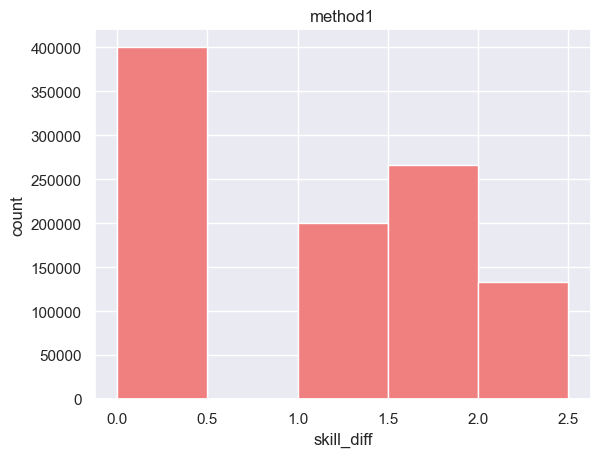

In [9]:
bins = np.linspace(0, 2.5, 6) # determines size of histogram bins, change as needed

plt.hist(skill_diff_1_list,bins=bins,color='lightcoral')
plt.gca().title.set_text('method1')
plt.xlabel('skill_diff')
plt.ylabel('count')
sns.set()

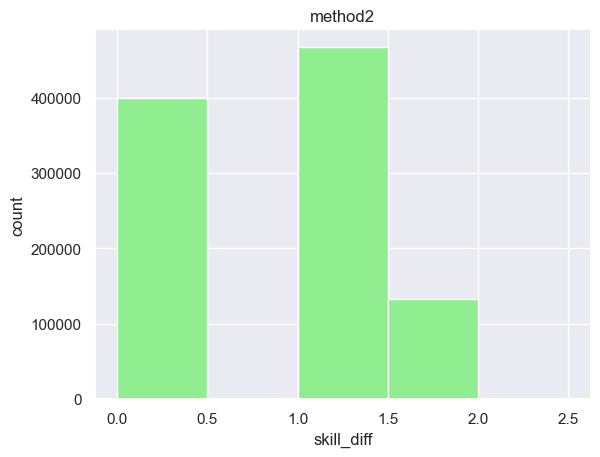

In [10]:
plt.hist(skill_diff_2_list,bins=bins, color='lightgreen')
plt.gca().title.set_text('method2') 
plt.xlabel('skill_diff')
plt.ylabel('count')
sns.set()